In [63]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/bid-data1/train_2.csv
/kaggle/input/bid-data1/train_1.csv
/kaggle/input/user-package-information-of-mobile-operators/test_1.csv
/kaggle/input/user-package-information-of-mobile-operators/train_all.csv
/kaggle/input/user-package-information-of-mobile-operators/train_2.csv
/kaggle/input/user-package-information-of-mobile-operators/test_2.csv


In [64]:
df1 = pd.read_csv('/kaggle/input/user-package-information-of-mobile-operators/train_2.csv')
df1 = df1.drop(columns='current_service')

df2 = pd.read_csv('/kaggle/input/user-package-information-of-mobile-operators/train_all.csv')
df2 = df2.drop(columns='current_service')

df3 = pd.read_csv('/kaggle/input/user-package-information-of-mobile-operators/test_1.csv')

df4 = pd.read_csv('/kaggle/input/user-package-information-of-mobile-operators/test_2.csv')

In [65]:
df = pd.concat([df1, df2, df3, df4])
df

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,user_id
0,1,0,18,50.4,108.2,118.9,177.70,300.00000,1,0,...,2639.084859,37.783333,37.783333,0.000000,1,19,0,0,0.0,012pSke7DsCrR985
1,1,0,16,84.4,78.2,56.9,80.40,0.00000,1,0,...,39155.458728,5.183333,41.833333,0.000000,1,20,0,0,0.0,012re3ZJSB6FptHW
2,1,0,9,80.5,75.6,74.3,93.40,0.00000,1,0,...,48755.950069,63.866667,67.666667,0.000000,1,18,0,0,0.0,013ElTBrRntuZDXz
3,1,0,15,69.3,63.8,50.2,62.20,0.00000,1,0,...,0.000000,5.750000,11.483333,0.000000,1,29,0,0,0.0,0146B9qQbNxIynoX
4,1,0,18,37.3,33.2,19.8,19.50,0.00000,1,0,...,5257.352050,4.050000,4.383333,0.000000,1,24,0,0,0.0,0149vWf6u8UrKyJT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160561,1,0,16,75.5,48.8,43.0,42.40,0.00000,1,0,...,2775.206189,177.433333,177.433333,0.000000,1,29,0,0,0.0,zZVvKgOxUP84amJR
160562,4,1,79,111.0,111.0,111.0,130.74,0.00000,0,1,...,0.006212,231.566667,0.000000,309.733333,1,37,0,0,0.0,ZzXcaMkx0V3WpGvh
160563,4,0,71,70.0,70.0,346.5,70.00,476.14535,0,0,...,476.536292,10.850000,30.733333,79.100000,1,40,0,0,0.0,zZY7sDCcMIQH05uG
160564,1,0,16,95.6,82.7,85.1,68.40,0.00000,1,0,...,76023.116140,2.350000,0.000000,2.350000,1,23,0,0,0.0,ZzYqgso5eKx6pucm


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479211 entries, 0 to 160565
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   service_type            1479211 non-null  int64  
 1   is_mix_service          1479211 non-null  int64  
 2   online_time             1479211 non-null  int64  
 3   1_total_fee             1479211 non-null  float64
 4   2_total_fee             1479211 non-null  object 
 5   3_total_fee             1479211 non-null  object 
 6   4_total_fee             1479211 non-null  float64
 7   month_traffic           1479211 non-null  float64
 8   many_over_bill          1479211 non-null  int64  
 9   contract_type           1479211 non-null  int64  
 10  contract_time           1479211 non-null  int64  
 11  is_promise_low_consume  1479211 non-null  int64  
 12  net_service             1479211 non-null  int64  
 13  pay_times               1479211 non-null  int64  
 14  pay_num 

In [67]:
a = df.groupby(['age']).agg({'month_traffic':'count'})
a

,month_traffic
age,
0,25155
4,2
5,2
6,1
7,1
...,...
84,1
86,1
87,1


In [68]:
df.replace(r'\N', np.nan, inplace=True)

In [69]:
df.isnull().sum()

service_type               0
is_mix_service             0
online_time                0
1_total_fee                0
2_total_fee               15
3_total_fee               10
4_total_fee                0
month_traffic              0
many_over_bill             0
contract_type              0
contract_time              0
is_promise_low_consume     0
net_service                0
pay_times                  0
pay_num                    0
last_month_traffic         0
local_trafffic_month       0
local_caller_time          0
service1_caller_time       0
service2_caller_time       0
gender                     2
age                        2
complaint_level            0
former_complaint_num       0
former_complaint_fee       0
user_id                    0
dtype: int64

In [70]:
df = df.dropna()

In [71]:
df.isnull().sum()

service_type              0
is_mix_service            0
online_time               0
1_total_fee               0
2_total_fee               0
3_total_fee               0
4_total_fee               0
month_traffic             0
many_over_bill            0
contract_type             0
contract_time             0
is_promise_low_consume    0
net_service               0
pay_times                 0
pay_num                   0
last_month_traffic        0
local_trafffic_month      0
local_caller_time         0
service1_caller_time      0
service2_caller_time      0
gender                    0
age                       0
complaint_level           0
former_complaint_num      0
former_complaint_fee      0
user_id                   0
dtype: int64

In [72]:
df['2_total_fee'] = df['2_total_fee'].astype('float64')
df['3_total_fee'] = df['3_total_fee'].astype('float64')
df['age'] = df['age'].astype('int64')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479189 entries, 0 to 160565
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   service_type            1479189 non-null  int64  
 1   is_mix_service          1479189 non-null  int64  
 2   online_time             1479189 non-null  int64  
 3   1_total_fee             1479189 non-null  float64
 4   2_total_fee             1479189 non-null  float64
 5   3_total_fee             1479189 non-null  float64
 6   4_total_fee             1479189 non-null  float64
 7   month_traffic           1479189 non-null  float64
 8   many_over_bill          1479189 non-null  int64  
 9   contract_type           1479189 non-null  int64  
 10  contract_time           1479189 non-null  int64  
 11  is_promise_low_consume  1479189 non-null  int64  
 12  net_service             1479189 non-null  int64  
 13  pay_times               1479189 non-null  int64  
 14  pay_num 

In [74]:
df['gender'].unique()

array([1, 2, 0, '2', '1', '0', '01', '02', '00'], dtype=object)

In [75]:
df['gender'].replace(0, np.nan, inplace=True)
df['gender'].replace('0', np.nan, inplace=True)
df['gender'].replace('00', np.nan, inplace=True)
df['gender'] = df['gender'].replace('2', 2)
df['gender'] = df['gender'].replace('1', 1)
df['gender'] = df['gender'].replace('01', 1)
df['gender'] = df['gender'].replace('02', 2)
df = df.dropna()
df['gender'] = df['gender'].astype('int64')
df = df.drop(columns='user_id')

In [76]:
df['gender'].unique()

array([1, 2])

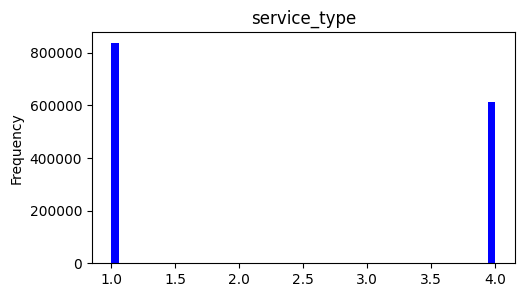

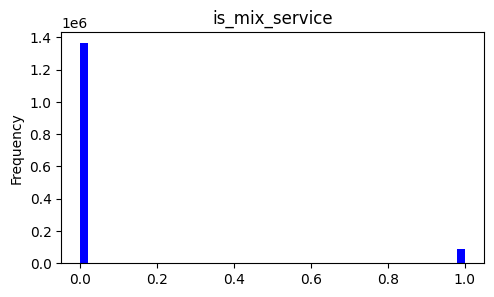

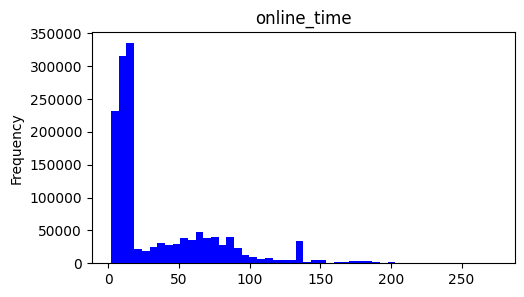

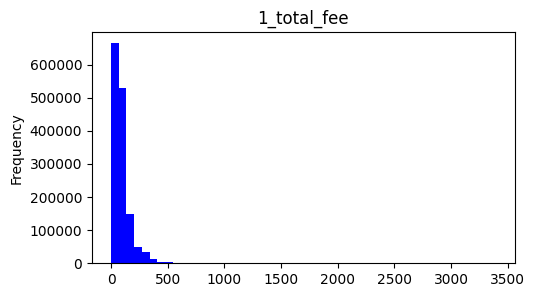

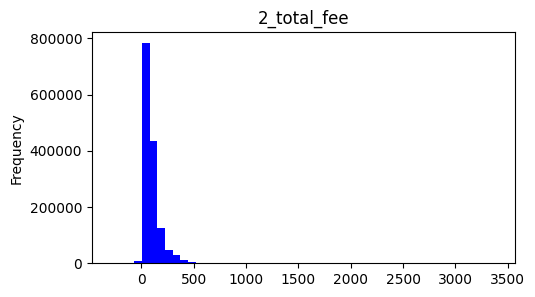

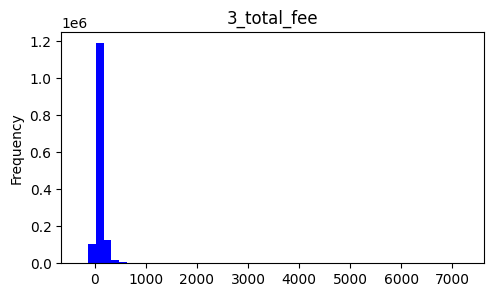

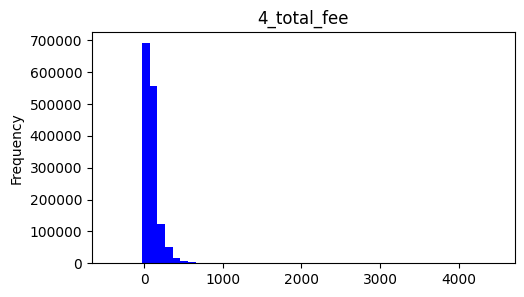

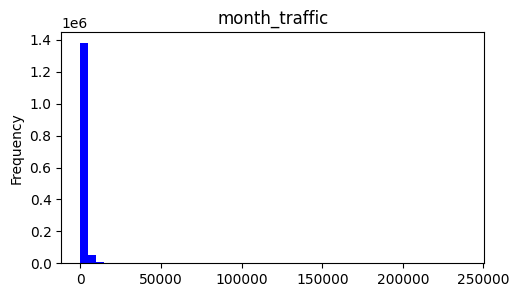

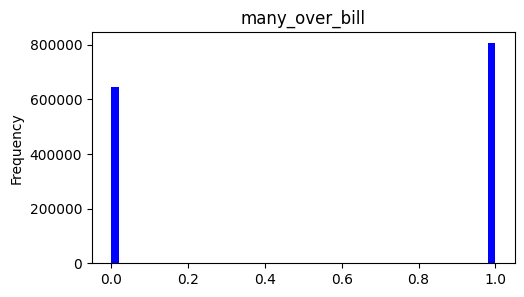

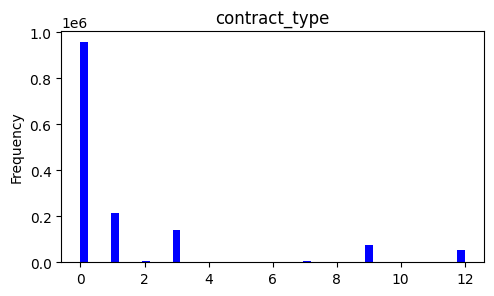

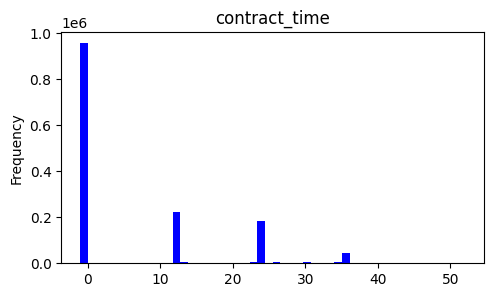

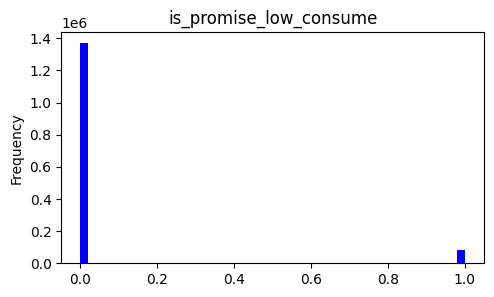

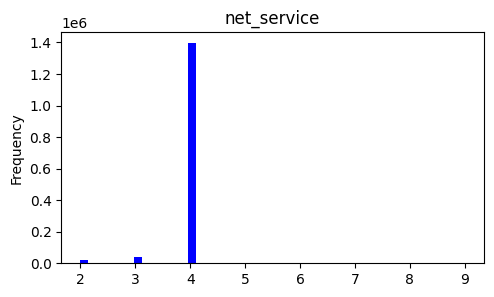

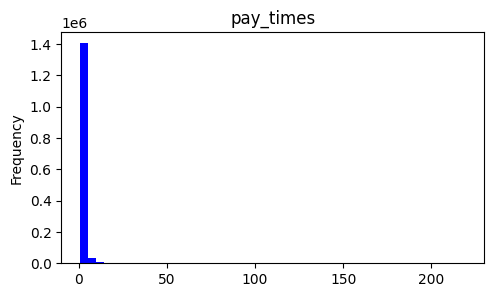

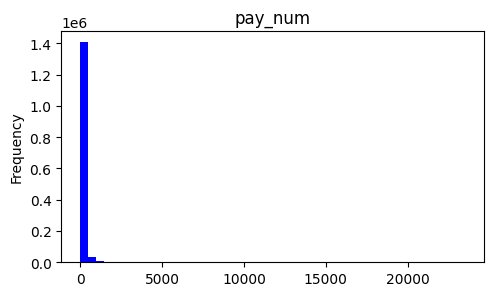

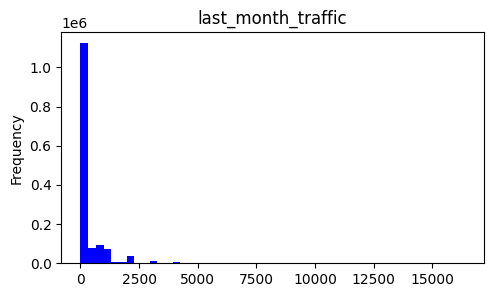

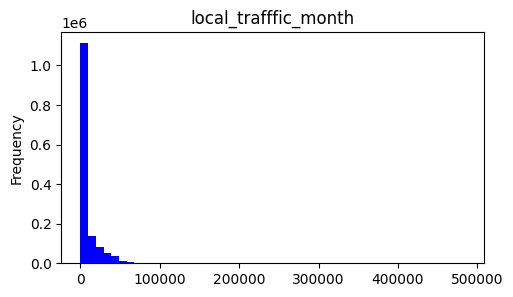

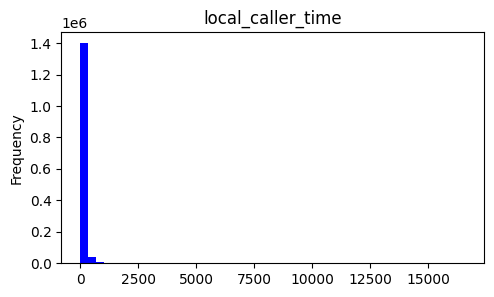

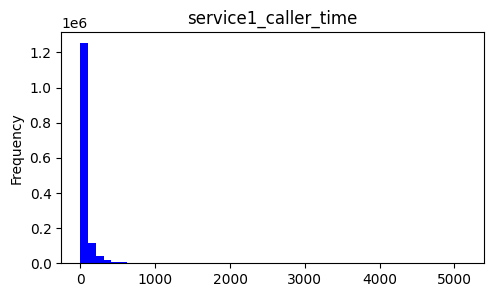

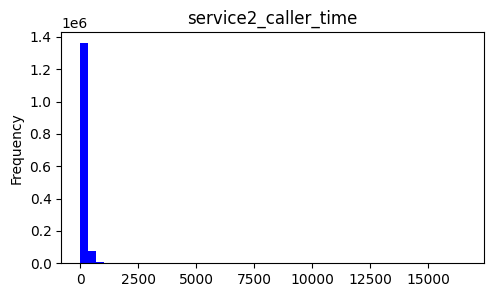

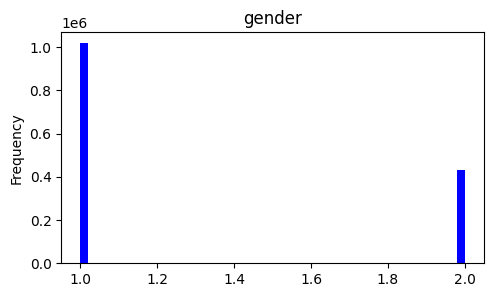

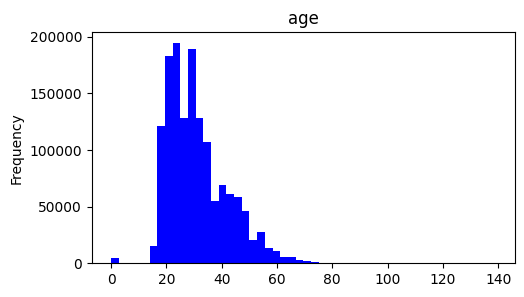

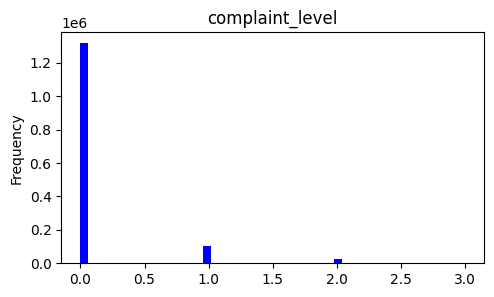

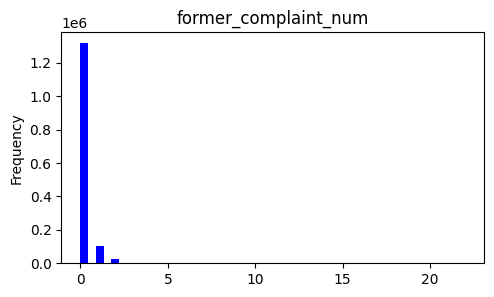

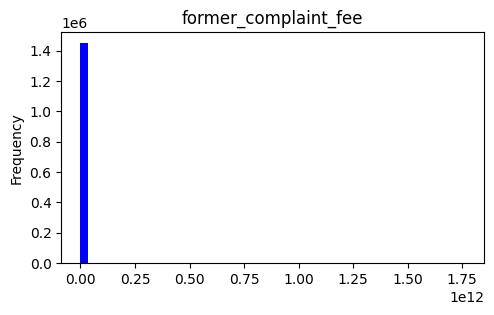

In [77]:
for column in columns_name:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    df[column].plot(kind='hist', bins=50, color='blue')
    plt.title(column)
    plt.show()

In [78]:
df = df.drop(columns=(['former_complaint_fee', 'is_promise_low_consume', 'is_mix_service', 'net_service', 'local_caller_time', 'pay_num', 'pay_times', 'month_traffic']))

In [79]:
df

,service_type,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,many_over_bill,contract_type,contract_time,last_month_traffic,local_trafffic_month,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num
0,1,18,50.4,108.2,118.9,177.70,1,0,0,0.000000,2639.084859,37.783333,0.000000,1,19,0,0
1,1,16,84.4,78.2,56.9,80.40,1,0,0,0.000000,39155.458728,41.833333,0.000000,1,20,0,0
2,1,9,80.5,75.6,74.3,93.40,1,0,0,0.000000,48755.950069,67.666667,0.000000,1,18,0,0
3,1,15,69.3,63.8,50.2,62.20,1,0,0,0.000000,0.000000,11.483333,0.000000,1,29,0,0
4,1,18,37.3,33.2,19.8,19.50,1,0,0,0.000000,5257.352050,4.383333,0.000000,1,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160561,1,16,75.5,48.8,43.0,42.40,1,0,0,0.000000,2775.206189,177.433333,0.000000,1,29,0,0
160562,4,79,111.0,111.0,111.0,130.74,0,1,24,0.000000,0.006212,0.000000,309.733333,1,37,0,0
160563,4,71,70.0,70.0,346.5,70.00,0,0,0,23.222478,476.536292,30.733333,79.100000,1,40,0,0
160564,1,16,95.6,82.7,85.1,68.40,1,0,0,0.000000,76023.116140,0.000000,2.350000,1,23,0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450404 entries, 0 to 160565
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   service_type          1450404 non-null  int64  
 1   online_time           1450404 non-null  int64  
 2   1_total_fee           1450404 non-null  float64
 3   2_total_fee           1450404 non-null  float64
 4   3_total_fee           1450404 non-null  float64
 5   4_total_fee           1450404 non-null  float64
 6   many_over_bill        1450404 non-null  int64  
 7   contract_type         1450404 non-null  int64  
 8   contract_time         1450404 non-null  int64  
 9   last_month_traffic    1450404 non-null  float64
 10  local_trafffic_month  1450404 non-null  float64
 11  service1_caller_time  1450404 non-null  float64
 12  service2_caller_time  1450404 non-null  float64
 13  gender                1450404 non-null  int64  
 14  age                   1450404 non-null  

In [81]:
y = df.gender
X = df.drop(columns='gender')

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Dense(9, activation = "relu"))

model.add(layers.Dense(15, activation = "relu"))

model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 1000,
 validation_data = (X_test, y_test)
)
print("Test-Accuracy:", np.max(results.history["accuracy"]))

Epoch 1/10
  96/1161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0797 - loss: 1933.5460

W0000 00:00:1713195984.786291      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5621 - loss: -42570.7578 - val_accuracy: 0.7016 - val_loss: -885065.6875
Epoch 2/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7028 - loss: -1883998.1250 - val_accuracy: 0.7016 - val_loss: -6691312.0000
Epoch 3/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7023 - loss: -9194252.0000 - val_accuracy: 0.7016 - val_loss: -19354778.0000
Epoch 4/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7022 - loss: -23531372.0000 - val_accuracy: 0.7016 - val_loss: -39909044.0000
Epoch 5/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7013 - loss: -46080380.0000 - val_accuracy: 0.7016 - val_loss: -69219272.0000
Epoch 6/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7024 - loss: -77564800.0000 - val_accuracy: 0.7016 - val_loss: -108269296.0000
Epoch 7/10
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7023 - loss: -118417192.0000 - val_accuracy: 0.7016 - val_loss: -158122112

Точность 70 процентов